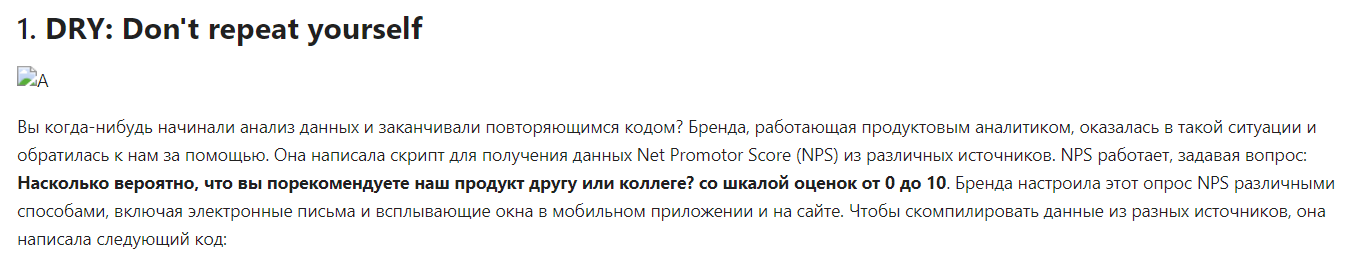

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 2020Q4_nps_email.csv to 2020Q4_nps_email.csv
Saving 2020Q4_nps_mobile.csv to 2020Q4_nps_mobile.csv
Saving 2020Q4_nps_web.csv to 2020Q4_nps_web.csv
Saving corrupted.csv to corrupted.csv


In [2]:
import pandas as pd

In [3]:
# Чтение ответов электронной почты NPS в DataFrame
email = pd.read_csv("2020Q4_nps_email.csv")
# добавление столбца почтового ресурса
email['source'] = 'email'

# Повторение для мобильных и веб-ответов NPS.
mobile = pd.read_csv("2020Q4_nps_mobile.csv")
mobile['source'] = 'mobile'
web = pd.read_csv("2020Q4_nps_web.csv")
web['source'] = 'web'

# Обьединение DataFrames
q4_nps = pd.concat([email,mobile,web])
q4_nps

response_date  user_id  nps_rating source
0       2020-11-06    11037           7  email
1       2020-12-24    34434           9  email
2       2020-12-03    49547           8  email
3       2020-10-04    13821           7  email
4       2020-10-23    29407           9  email
...            ...      ...         ...    ...
2285    2020-12-25    10656           8    web
2286    2020-11-07    32918          10    web
2287    2020-10-16    15667          10    web
2288    2020-11-20    47153           7    web
2289    2020-10-17    47071           5    web

[6043 rows x 4 columns]

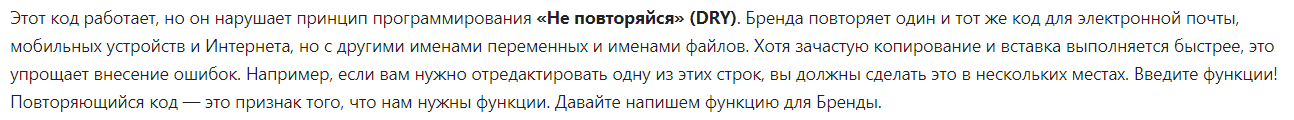

In [4]:
def convert_csv_to_df(csv_name, source_type):
    """ Converts an NPS CSV into a DataFrame with a column for the source. 

    Args:
        csv_name (str): The name of the NPS CSV file.
        source_type (str): The source of the NPS responses.

    Returns:
        A DataFrame with the CSV data and a column, source.
    """   
    df = pd.read_csv(csv_name)
    df['source'] = source_type
    return df

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 2020Q4_nps_mobile.csv to 2020Q4_nps_mobile (1).csv
User uploaded file "2020Q4_nps_mobile.csv" with length 34419 bytes


In [6]:
# Test the function on the mobile data: 
convert_csv_to_df("2020Q4_nps_mobile.csv", "mobile")

response_date  user_id  nps_rating  source
0       2020-12-29    14178           3  mobile
1       2020-10-29    33221           1  mobile
2       2020-11-01    21127          10  mobile
3       2020-12-07    42894           3  mobile
4       2020-11-26    30501           5  mobile
...            ...      ...         ...     ...
1796    2020-12-29    49529           3  mobile
1797    2020-12-24    23671           7  mobile
1798    2020-11-28    39954           7  mobile
1799    2020-12-19    21098           7  mobile
1800    2020-12-23    14919           7  mobile

[1801 rows x 4 columns]

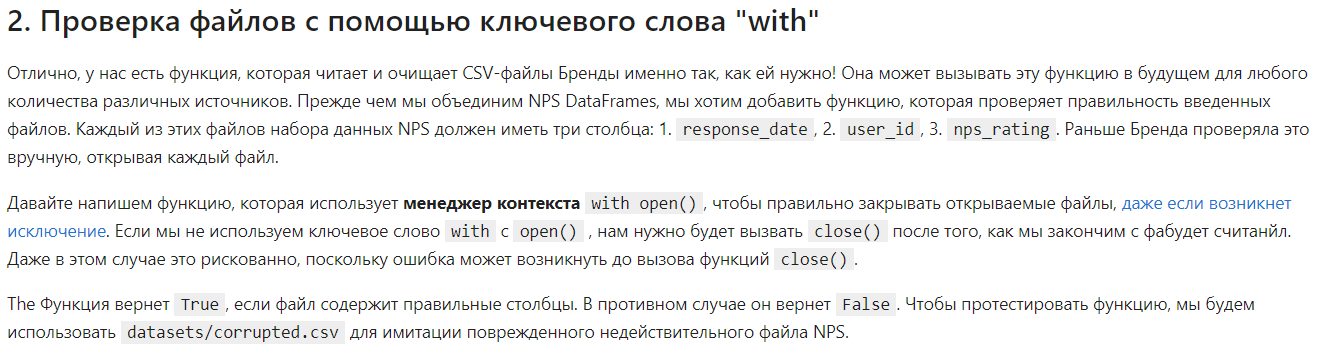

In [7]:
def check_csv(csv_name):
    """ Checks if a CSV has three columns: response_date, user_id, nps_rating

    Args:
        csv_name (str): The name of the CSV file.

    Returns:
        Boolean: True if the CSV is valid, False otherwise 
    """
    with open(csv_name) as f:
        first_line = f.readline()
        # Return true if the CSV has the three specified columns:
        if first_line == "response_date,user_id,nps_rating\n":
            return True

        return False

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving corrupted.csv to corrupted (1).csv
User uploaded file "corrupted.csv" with length 45787 bytes


In [9]:
# Test the function on a corrupted NPS file:
print(check_csv('corrupted.csv'))

False


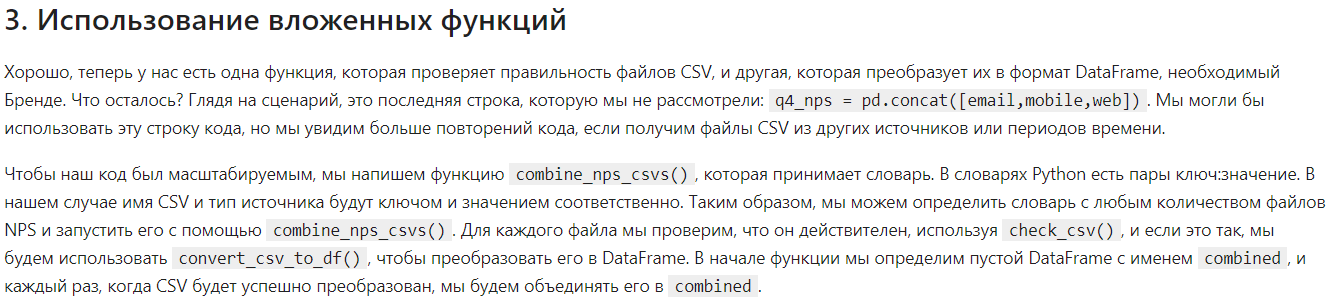

In [10]:
def combine_nps_csvs(csvs_dict):
    # Define combine as an empty DataFrame:
    combined = pd.DataFrame()

    # Iterate over csvs_dict to get the name and source of the CSVs:
    for name, source in csvs_dict.items():
        # Check if the csv is valid:
        if check_csv(name):
            # Convert the CSV using convert_csv_to_df():
            temp = convert_csv_to_df(name, source)
            # Concatenate combined and temp:
            combined = pd.concat([combined, temp])

        # If the file is not valid, print a message with the CSV's name:
        else:
            print(name + " is not a valid file and will not be added.")

    # Return the combined DataFrame
    return combined
q4_nps

response_date  user_id  nps_rating source
0       2020-11-06    11037           7  email
1       2020-12-24    34434           9  email
2       2020-12-03    49547           8  email
3       2020-10-04    13821           7  email
4       2020-10-23    29407           9  email
...            ...      ...         ...    ...
2285    2020-12-25    10656           8    web
2286    2020-11-07    32918          10    web
2287    2020-10-16    15667          10    web
2288    2020-11-20    47153           7    web
2289    2020-10-17    47071           5    web

[6043 rows x 4 columns]

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 2020Q4_nps_email.csv to 2020Q4_nps_email (1).csv
Saving 2020Q4_nps_mobile.csv to 2020Q4_nps_mobile (2).csv
Saving 2020Q4_nps_web.csv to 2020Q4_nps_web (1).csv
Saving corrupted.csv to corrupted (2).csv
User uploaded file "2020Q4_nps_email.csv" with length 37531 bytes
User uploaded file "2020Q4_nps_mobile.csv" with length 34419 bytes
User uploaded file "2020Q4_nps_web.csv" with length 44042 bytes
User uploaded file "corrupted.csv" with length 45787 bytes


In [12]:
my_files = {
  "2020Q4_nps_email.csv": "email",
  "2020Q4_nps_mobile.csv": "mobile",
  "2020Q4_nps_web.csv": "web",
  "corrupted.csv": "social_media"
}

# Test the function on the my_files dictionary:
combine_nps_csvs(my_files)

corrupted.csv is not a valid file and will not be added.


response_date  user_id  nps_rating source
0       2020-11-06    11037           7  email
1       2020-12-24    34434           9  email
2       2020-12-03    49547           8  email
3       2020-10-04    13821           7  email
4       2020-10-23    29407           9  email
...            ...      ...         ...    ...
2285    2020-12-25    10656           8    web
2286    2020-11-07    32918          10    web
2287    2020-10-16    15667          10    web
2288    2020-11-20    47153           7    web
2289    2020-10-17    47071           5    web

[6043 rows x 4 columns]

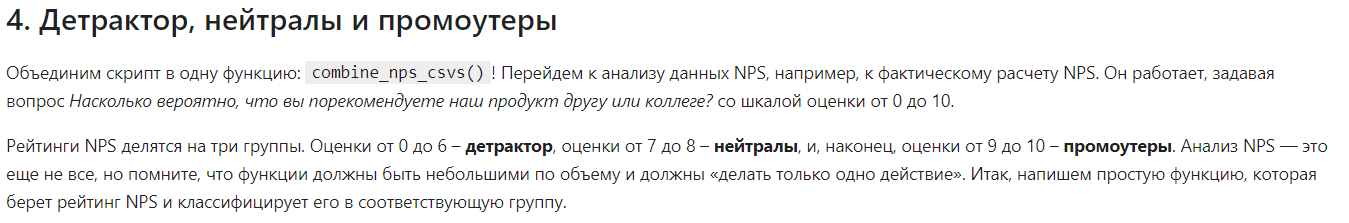

In [13]:
def categorize_nps(x):
    """ 
    Takes a NPS rating and outputs whether it is a "promoter", 
    "passive", "detractor", or "invalid" rating. "invalid" is
    returned when the rating is not between 0-10.

    Args:
        x: The NPS rating

    Returns:
        String: the NPS category or "invalid".
    """
    if (x >= 0 and x <= 6):
        return 'detractor'
    elif (x >= 7 and x <= 8):
        return 'passive'
    elif (x >= 9 and x <= 10):
        return 'promoter'

    return 'invalid'


# Test our function:
categorize_nps(8)

'passive'

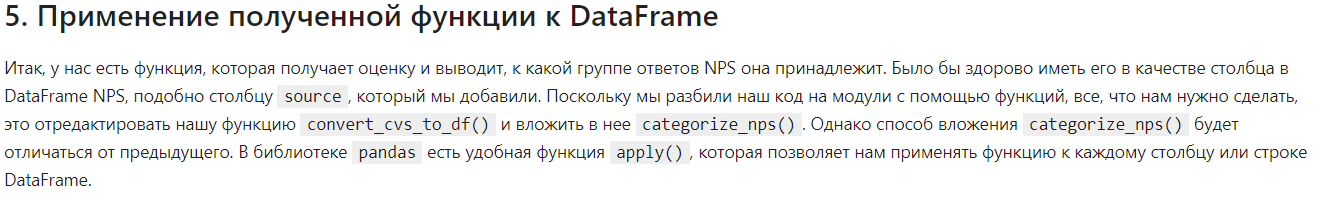

In [14]:
def convert_csv_to_df(csv_name, source_type):    
    """
    Convert an NPS CSV into a DataFrame with columns for the source and NPS group.

    Args:
        csv_name (str): The name of the NPS CSV file.
        source_type (str): The source of the NPS responses.

    Returns:
         A DataFrame with the CSV data and columns: source and nps_group.
    """
    df = pd.read_csv(csv_name)
    df['source'] = source_type
    # New column nps_group which applies categorize_nps to nps_rating:
    df['nps_group'] = df['nps_rating'].apply(categorize_nps)
    return df


# Test the updated function with mobile data:
convert_csv_to_df("2020Q4_nps_mobile.csv", "mobile")

response_date  user_id  nps_rating  source  nps_group
0       2020-12-29    14178           3  mobile  detractor
1       2020-10-29    33221           1  mobile  detractor
2       2020-11-01    21127          10  mobile   promoter
3       2020-12-07    42894           3  mobile  detractor
4       2020-11-26    30501           5  mobile  detractor
...            ...      ...         ...     ...        ...
1796    2020-12-29    49529           3  mobile  detractor
1797    2020-12-24    23671           7  mobile    passive
1798    2020-11-28    39954           7  mobile    passive
1799    2020-12-19    21098           7  mobile    passive
1800    2020-12-23    14919           7  mobile    passive

[1801 rows x 5 columns]

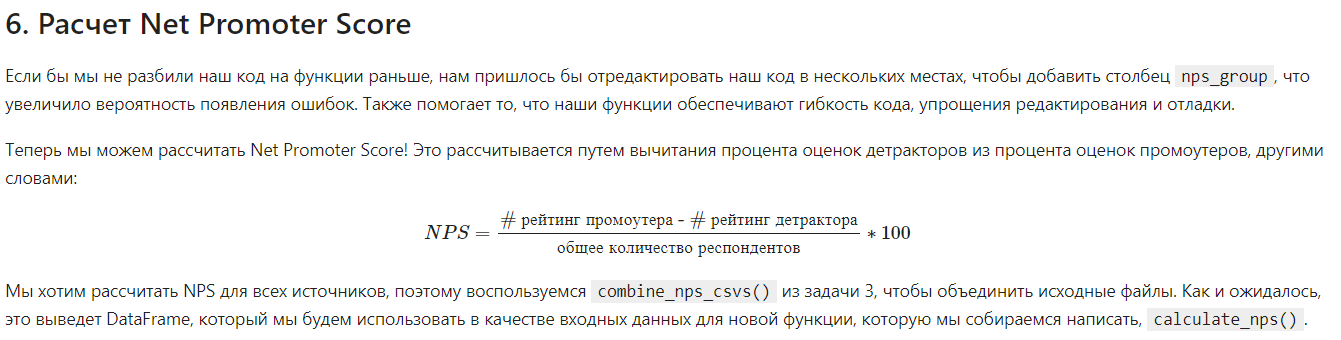

In [15]:
def calculate_nps(dataframe):
    # Calculate the NPS score using the nps_group column 
    counts = dataframe['nps_group'].value_counts()
    detract = counts['detractor']
    promo = counts['promoter']
    
    # Return the NPS Score:
    return ((promo-detract)/ counts.sum()) * 100


my_files = {
  "2020Q4_nps_email.csv": "email",
  "2020Q4_nps_web.csv": "web",
  "2020Q4_nps_mobile.csv": "mobile",
}


# Test the function on the my_files dictionary:
q4_nps = combine_nps_csvs(my_files)
calculate_nps(q4_nps)

9.995035578355122

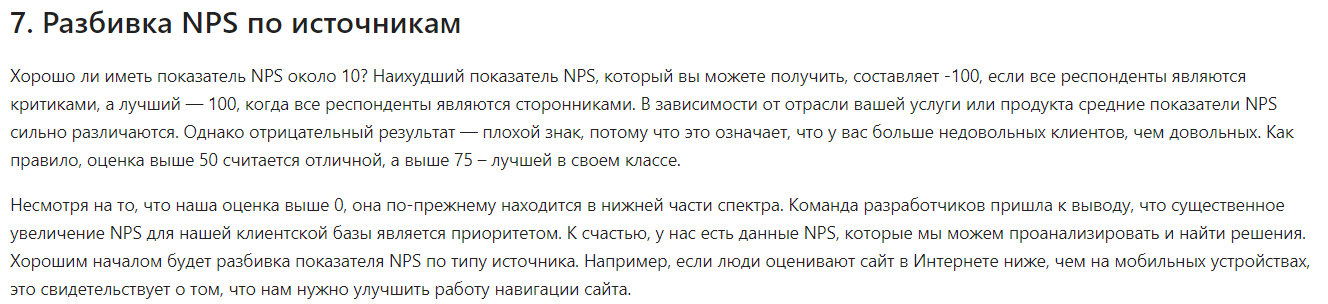

In [16]:
def calculate_nps_by_source(dataframe):
    # Group the DataFrame by source and apply calculate_nps():
    return dataframe.groupby(['source']).apply(calculate_nps)


my_files = {
  "2020Q4_nps_email.csv": "email",
  "2020Q4_nps_web.csv": "web",
  "2020Q4_nps_mobile.csv": "mobile",
}


# Test the function on the my_files dictionary:
q4_nps = combine_nps_csvs(my_files)
calculate_nps_by_source(q4_nps)

source
email     18.596311
mobile   -14.714048
web       22.096070
dtype: float64

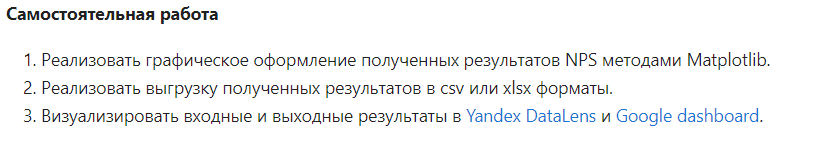

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df_nps = pd.DataFrame(calculate_nps_by_source(q4_nps))
df_nps

0
source           
email   18.596311
mobile -14.714048
web     22.096070

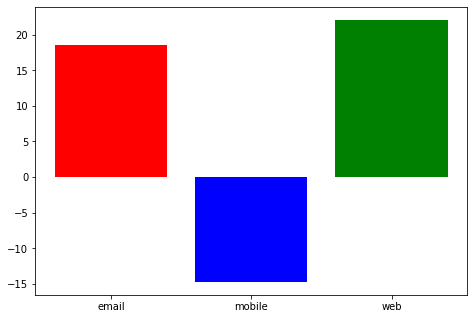

In [19]:
df_1 = pd.DataFrame(calculate_nps_by_source(q4_nps))
df_1['1'] = df_1.index
x = df_1.values[:, 1]
y = df_1.values[:, 0]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
colors = ('r', 'b', 'g')
ax.bar(x, y, color = colors)
plt.show()

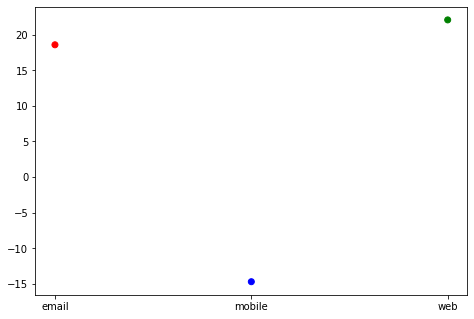

In [20]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
colors = ('r', 'b', 'g')
plt.scatter(x, y, color = colors)
plt.show()

In [21]:
import openpyxl as xls

In [23]:
excel_file = pd.ExcelWriter('nps.xlsx')
df_nps.to_excel(excel_file)
excel_file.save()